<a href="https://colab.research.google.com/github/ClementeGarcia/Simulaci-n-1/blob/main/Tablero_de_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tablero de  Colores

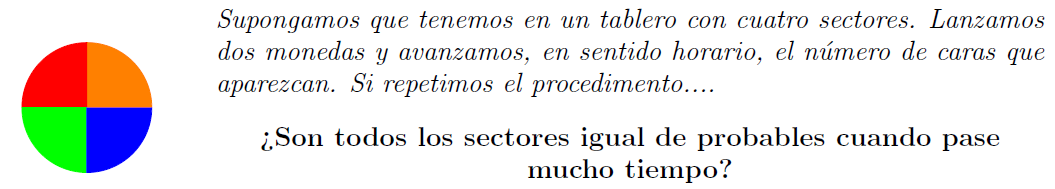

$x \sim U(0,1)\to$ distribuciones continuas

$x \sim U(0,1)\to$ distribuciones discretas


Lanzamos dos monedas y avanzamos, en sentido horario, el numero de caras que aparezcan. Si repetimos el procedimiento...

¿Son todos los sectores igualmente probables cuando pase mucho tiempo?

La variable de estado es la posicion de la ficha
$$\{verde, rojo, naranja, azul\}$$
Los posibles estados de las monedas
$$CC, CX, XC, XX$$
Con probabilidades
$$P_{CC} =1/4, P_{CX}=P_{XC}=1/2, P_{XX}=1/4$$
Denotemos por

$x_n$ a la probabilidad de estar en el sector **naranja** tras _n_ razonamientos

$y_n$ a la probabilidad de estar en el sector **azul** tras _n_ razonamientos

$z_n$ a la probabilidad de estar en el sector **verde** tras _n_ razonamientos

$t_n$ a la probabilidad de estar en el sector **rojo** tras _n_ razonamientos

Por el Teorma de la probabilidad total
$$P(A)=P(A|B_1)P(B_1)+...+P(A|B_5)P(B_5)$$
Analizamos la situacion para $n=1$, usando el teorema de probabilidad total

Para **Naranja**
$$x_1=P(Naranja)=P(Naranja|Naranja)P(Naranja)+P(Naranja|Azul)P(Azul)+P(Naranja|Verde)P(Verde)+P(Naranja|Rojo)P(Rojo)$$
$$x_1=(1/4) x_0+0\cdot y_0+(1/4)z_0+(1/2)t_0$$

Para **Azul**
$$y_1=P(Azul)=P(Azul|Naranja)P(Naranja)+P(Azul|Azul)P(Azul)+P(Azul|Verde)P(Verde)+P(Azul|Rojo)P(Rojo)$$
$$y_1=(2/4) x_0+(1/4)y_0+0\cdot z_0+(1/4)t_0$$


Para **Verde**
$$z_1=P(Verde)=P(Verde|Naranja)P(Naranja)+P(Verde|Azul)P(Azul)+P(Verde|Verde)P(Verde)+P(Verde|Rojo)P(Rojo)$$
$$z_1=(1/4) x_0+(2/4)y_0+(1/4) z_0+0 \cdot t_0$$

Para **Rojo**
$$t_1=P(Rojo)=P(Rojo|Naranja)P(Naranja)+P(Rojo|Azul)P(Azul)+P(Rojo|Verde)P(Verde)+P(Rojo|Rojo)P(Rojo)$$
$$t_1=0 \cdot x_0+(1/4)y_0+(2/4) z_0+(1/4) t_0$$



$$
\begin{cases}
x_1 = \frac{1}{4} x_0 + 0 \cdot y_0 + \frac{1}{4} z_0 + \frac{2}{4} t_0 \\
y_1 = \frac{2}{4} x_0 + \frac{1}{4} y_0 + 0 \cdot z_0 + \frac{1}{4} t_0 \\
z_1 = \frac{1}{4} x_0 + \frac{2}{4} y_0 + \frac{1}{4} z_0 + 0 \cdot t_0 \\
t_1 = 0 \cdot x_0 + \frac{1}{4} y_0 + \frac{2}{4} z_0 + \frac{1}{4} t_0
\end{cases}
$$

$$
\text{Para } n=2:
$$

$$
\begin{cases}
x_2 = \frac{1}{4} x_1 + 0 \cdot y_1 + \frac{1}{4} z_1 + \frac{2}{4} t_1 \\
y_2 = \frac{2}{4} x_1 + \frac{1}{4} y_1 + 0 \cdot z_1 + \frac{1}{4} t_1 \\
z_2 = \frac{1}{4} x_1 + \frac{2}{4} y_1 + \frac{1}{4} z_1 + 0 \cdot t_1 \\
t_2 = 0 \cdot x_1 + \frac{1}{4} y_1 + \frac{2}{4} z_1 + \frac{1}{4} t_1
\end{cases}
$$

$$
\begin{pmatrix}
x_n \\
y_n \\
z_n \\
t_n
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{4} & 0 & \frac{1}{4} & \frac{2}{4} \\
\frac{2}{4} & \frac{1}{4} & 0 & \frac{1}{4} \\
\frac{1}{4} & \frac{2}{4} & \frac{1}{4} & 0 \\
0 & \frac{1}{4} & \frac{2}{4} & \frac{1}{4}
\end{pmatrix}
\cdot
\begin{pmatrix}
x_{n-1} \\
y_{n-1} \\
z_{n-1} \\
t_{n-1}
\end{pmatrix}
$$

$$
X_n = A \cdot X_{n-1} = A^2 \cdot X_{n-2} = \cdots = A^n \cdot X_0
$$

$$
\text{Para resolver el problema, debemos calcular } A^n.
$$

#Simulación

In [3]:
import random as rd
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 2                # Número de lanzamientos de una moneda por cada experimento
p = 0.5              # Probabilidad de obtener cara
n_p = 100000         # Número total de experimentos

# Genera una muestra de variables binomiales: cada valor representa cuántas caras salieron en n lanzamientos
caras = np.random.binomial(n, p, n_p)

# Calcula la suma acumulada de caras y luego toma el módulo 4 para clasificar en 4 posibles "sectores" (0 a 3)
Po = np.cumsum(caras) % 4

# Inicializa un diccionario para contar cuántas veces aparece cada sector (0, 1, 2, 3)
f = {0: 0, 1: 0, 2: 0, 3: 0}

# Cuenta cuántas veces aparece cada valor en la lista `Po`
for Ps in Po:
    f[Ps] += 1

# Convierte los conteos a  probabilidades
for Ps in f:
    f[Ps] /= n_p

# Imprime la probabilidad estimada de caer en cada sector
for sector, prob in f.items():
    print(f"Posicion {sector}: probabilidad = {prob:.4f}")

Posicion 0: probabilidad = 0.2488
Posicion 1: probabilidad = 0.2503
Posicion 2: probabilidad = 0.2497
Posicion 3: probabilidad = 0.2511


In [19]:
 def simular_probabilidades(k, n, p, n_p):# Función que simula el experimento k veces
    # Diccionario para almacenar la evolución de la probabilidad promedio de cada sector (0 a 3)
    propos = {i: [] for i in range(4)}
    # Diccionario para acumular la suma de probabilidades en cada sector
    suma = {i: 0 for i in range(4)}

    # Repetimos el experimento k veces
    for rep in range(1, k + 1):
        # Simula n_p veces el número de caras en n lanzamientos y calcula la suma acumulada módulo 4
        Po = np.cumsum(np.random.binomial(n, p, n_p)) % 4

        # Cuenta cuántas veces cae cada sector
        frecuencias = {i: 0 for i in range(4)}
        for valor in Po:
            frecuencias[valor] += 1

        # Calcula la probabilidad relativa por sector y acumula su promedio
        for i in range(4):
            prob = frecuencias[i] / n_p
            suma[i] += prob                  # acumula la probabilidad
            propos[i].append(suma[i] / rep)  # guarda el promedio

    return propos  # retorna los promedios

In [20]:
# Parámetros
k, n, p, n_p = 1000, 2, 0.5, 100000
propos = simular_probabilidades(k, n, p, n_p)

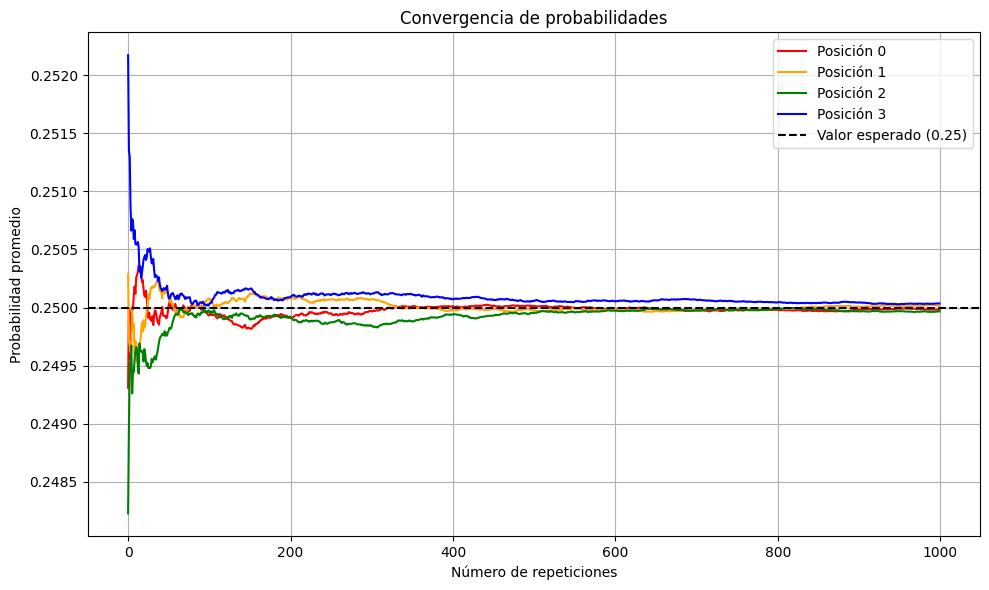

In [21]:
# Graficar
colores = ['red', 'orange', 'green', 'blue']
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(propos[i], label=f"Posición {i}", color=colores[i])
plt.axhline(0.25, color='black', linestyle='--', label='Valor esperado (0.25)')
plt.xlabel("Número de repeticiones")
plt.ylabel("Probabilidad promedio")
plt.title("Convergencia de probabilidades")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
